# C1. A simple example of linear regression

## 1. Import libraries

In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## 2. Create a dataset

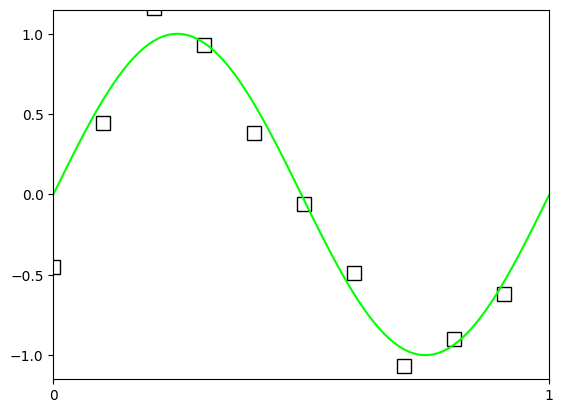

In [62]:
# create the x-grid of samples
x   = np.linspace(0.0,1.0,100)
# generate samples following a sinus function
y_t = np.sin(2*np.pi*x)
# add gaussian noise: mean = 0, var = 0.1
y_o = y_t + np.random.normal(0.0, 0.2, x.shape)

# split samples indices into a train (10 samples) and test set (90 samples)
i       = np.linspace(1,100,100, dtype=int)-1
i_train = i[0:100:10]
i_test  = np.setdiff1d(i, i_train)

# display the true and noisy train samples
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10, fillstyle='none')
plt.plot(x,y_t,'-', color='lime', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.show()


## 3. Fit a polynomial model

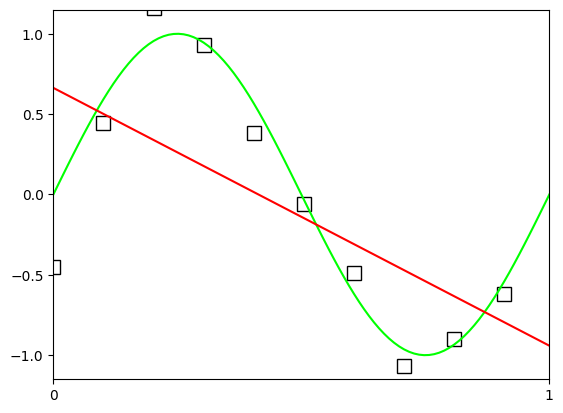

The RMSE on the train set is: 0.5586131543609998


In [63]:
## fit a polynomial regression model to the dataset

# define polynomial order (def=1)
poly_order = 1
poly=PolynomialFeatures(degree=poly_order)
# expand x (or linearize the problem)
# this is specific to sklearn, could be done in a simple way with numpy
x_poly=poly.fit_transform(x.reshape(-1, 1))

# fit polynomial function (with least square errors)
clf = linear_model.LinearRegression()
clf.fit(x_poly[i_train], y_o[i_train])

# predict values from model
y_p = clf.predict(x_poly[i])

# display the predicted values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10, fillstyle='none')
plt.plot(x,y_t,'-', color='lime', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.plot(x,y_p,'r-', fillstyle='none')
plt.show()

# compute score (LS)
e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())

print("The RMSE on the train set is:", e_train)



### Question 1:

Q1.1 REDO this part with increasing polynomial order from 0 to 15  
Q1.2 What do you observe? Do you have an idea about what is going on?

### Correction 1:

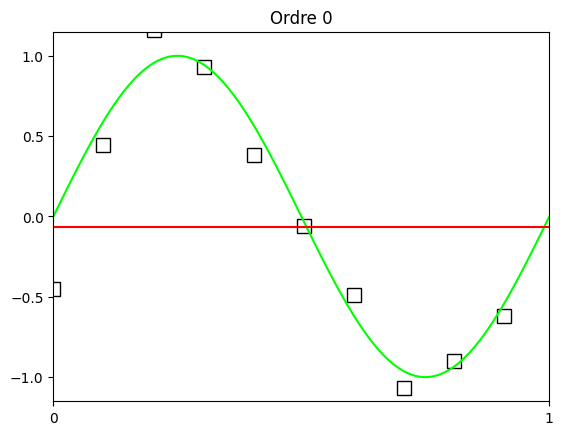

The RMSE on the train set is: 0.7271286622901892


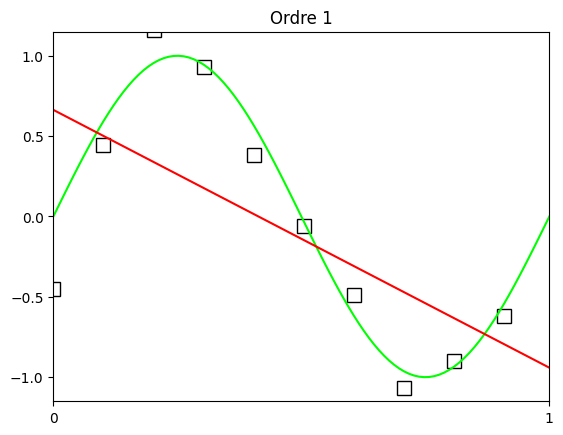

The RMSE on the train set is: 0.5586131543609998


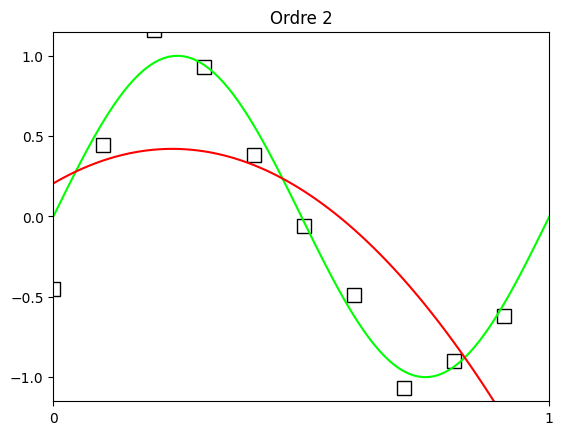

The RMSE on the train set is: 0.4851356471983292


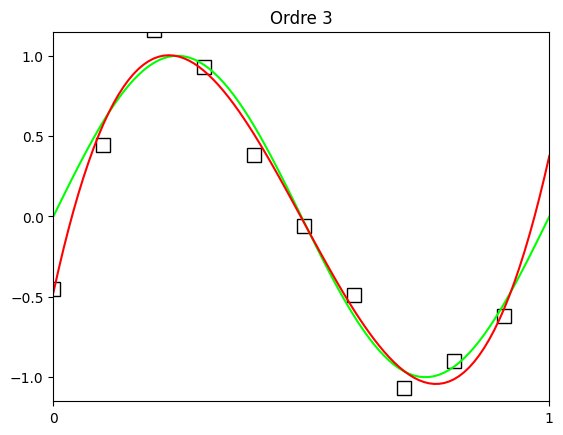

The RMSE on the train set is: 0.1008542074869986


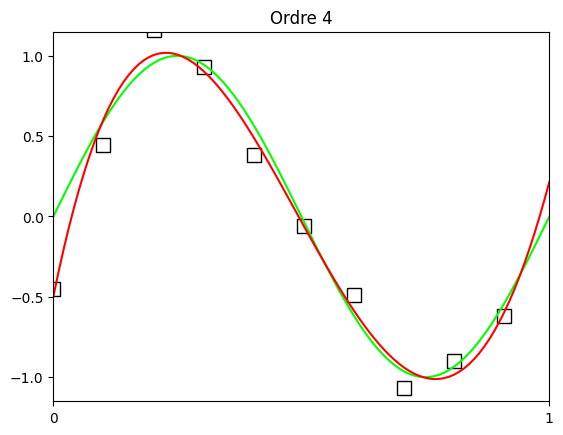

The RMSE on the train set is: 0.09846477929081607


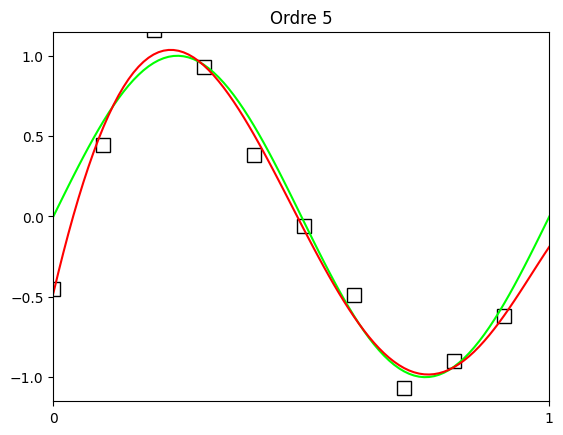

The RMSE on the train set is: 0.09391789678754439


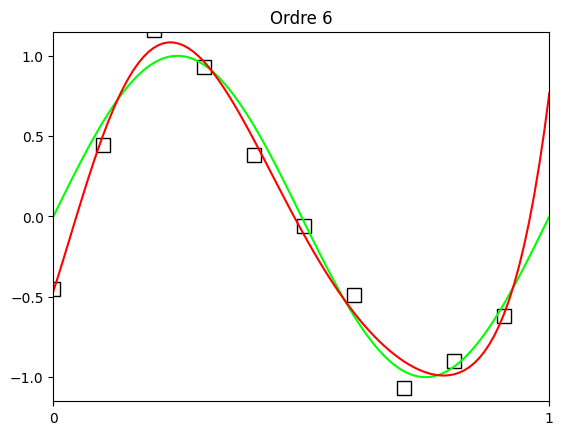

The RMSE on the train set is: 0.08782014777485993


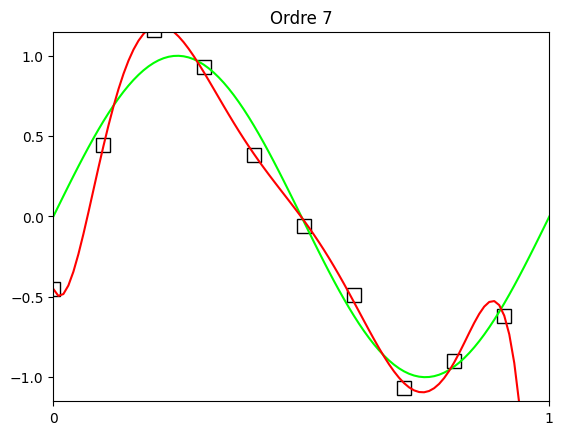

The RMSE on the train set is: 0.023613461902583205


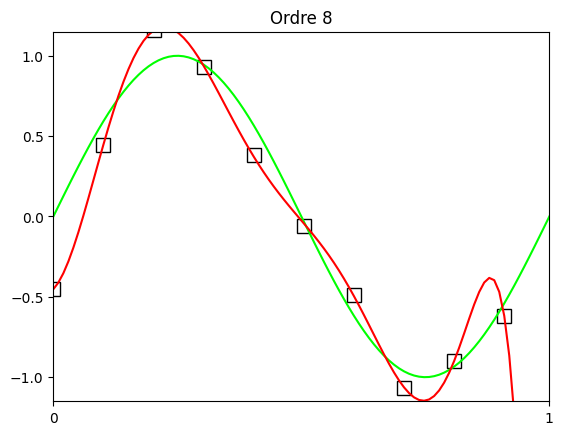

The RMSE on the train set is: 0.007264317058599887


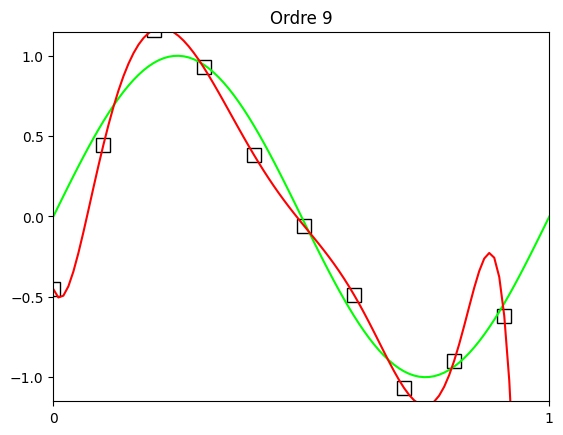

The RMSE on the train set is: 2.7575127140039408e-12


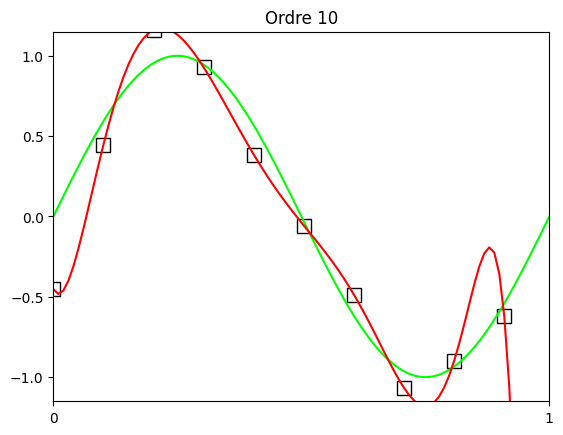

The RMSE on the train set is: 9.748588150196138e-13


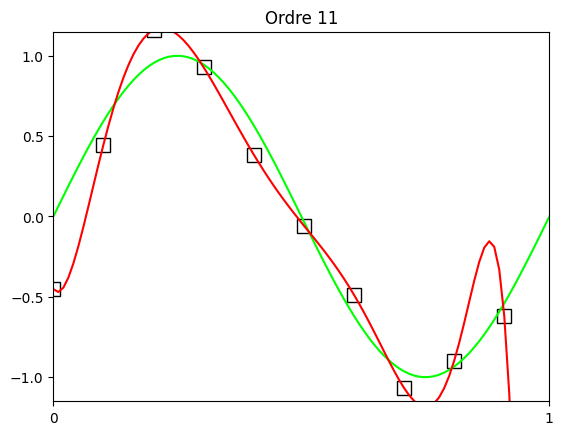

The RMSE on the train set is: 3.5907446897304504e-13


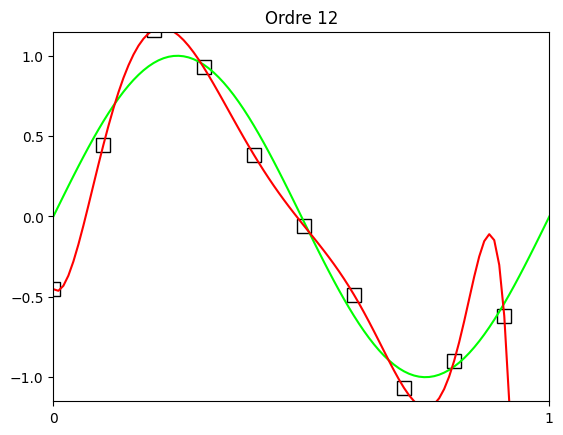

The RMSE on the train set is: 2.133893821097606e-13


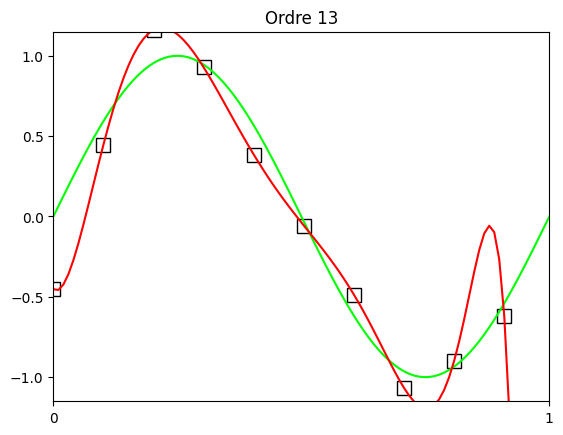

The RMSE on the train set is: 5.601211475034209e-13


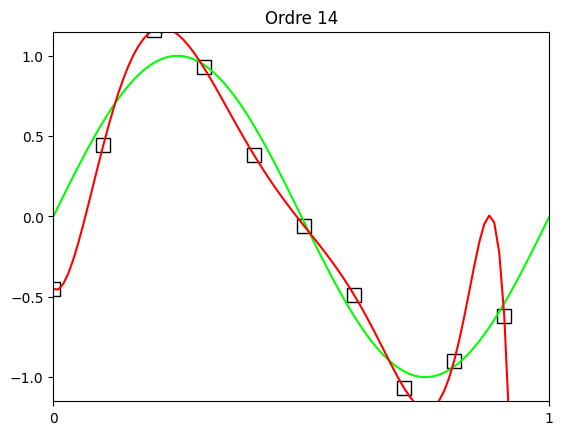

The RMSE on the train set is: 2.60837996354208e-13


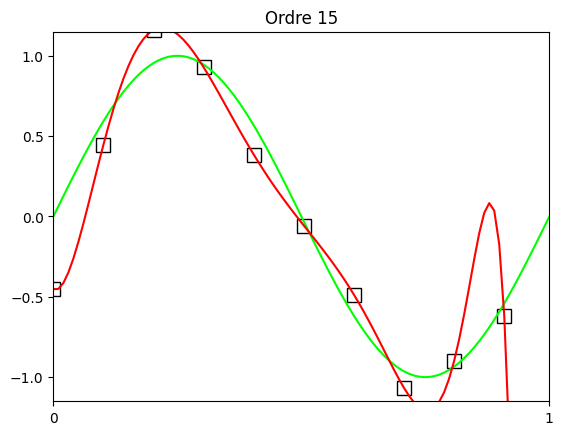

The RMSE on the train set is: 1.9431218643820484e-13


In [64]:
# Q1.1
max_poly_order = 15
for poly_order in np.arange(0, max_poly_order+1, 1, dtype=int):
   ## fit a polynomial regression model to the dataset
  poly=PolynomialFeatures(degree=poly_order)
  # expand x (or linearize the problem)
  # this is specific to sklearn, could be done in a simple way with numpy
  x_poly=poly.fit_transform(x.reshape(-1, 1))

  # fit polynomial function (with least square errors)
  clf = linear_model.LinearRegression()
  clf.fit(x_poly[i_train], y_o[i_train])

  # predict values from model
  y_p = clf.predict(x_poly[i])

  # display the predicted values
  plt.title(f'Ordre {poly_order}')
  plt.plot(x[i_train],y_o[i_train],'ks', markersize=10, fillstyle='none')
  plt.plot(x,y_t,'-', color='lime', fillstyle='none')
  plt.xlim((0,1))
  plt.ylim((-1-0.15,+1+0.15))
  plt.xticks([0,1])
  plt.yticks(np.arange(-1, 1.25, 0.5))
  plt.plot(x,y_p,'r-', fillstyle='none')
  plt.show()

  # compute score (LS)
  e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())

  print("The RMSE on the train set is:", e_train)



###### Q1.2
À chaque incrémentation de l'orde du polynome du modèle LinearRegression(), ce dérnier exhibe des très (trop !) bonnes performances avec les données d’apprentissages. Le fait que notre modèle prédictif produit par l’algorithme de Machine Learning (LinearRegression()) s’adapte trop bien au Training Set, il y a de fortes chances qu'il s’agisse d’un problème de sur apprentissage (Overfitting). Par conséquent, le modèle prédictif capturera tous les “aspects” et détails qui caractérisent les données du Training Set. Dans ce sens, il capturera toutes les fluctuations et variations aléatoires des données du Training Set. En d’autres termes, le modèle prédictif capturera les corrélations généralisables et le bruit produit par les données. Quand un tel événement se produit, le modèle prédictif pourra donner de très bonnes prédictions sur les données du Training Set (les données qu’il a déjà “vues” et auxquelles il s’y est adapté), mais il prédira mal sur des données qu’il n’a pas encore vues lors de sa phase d’apprentissage. On dit que la fonction prédictive se généralise mal. Et que le modèle souffre d’Overfitting (sur apprentissage).

## 4. Memory and generalization

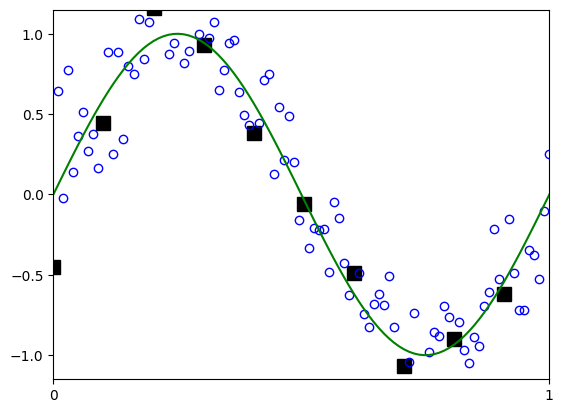

In [65]:
## Now we redo the same experiment but adding the test samples
## Fit on the train set
## Evaluate on the train AND the test set

# First, we display the true values and the train/test noisy values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10)
plt.plot(x[i_test],y_o[i_test],'bo', fillstyle='none')
plt.plot(x,y_t,'g-', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.show()


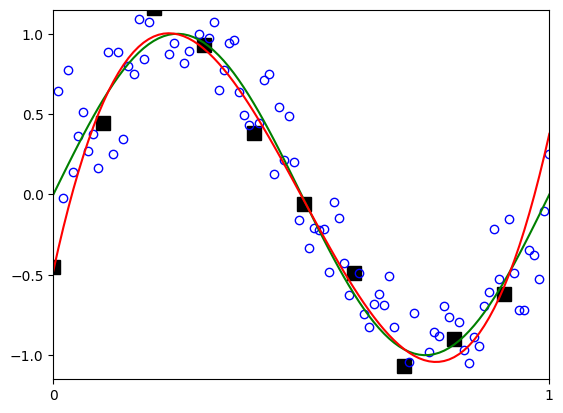

The RMSE on the train set is: 0.1008542074869986
The RMSE on the test set is: 0.27573015101049336


In [66]:
## Now we run again the experiments, but with computing the error on the test set also

# define polynomial order
poly_order = 3
poly=PolynomialFeatures(degree=poly_order)
# expand x (or linearize the problem)
# this is specific to sklearn, could be done in a simple way with numpy
x_poly=poly.fit_transform(x.reshape(-1, 1))

# fit polynomial function (with least square errors)
clf = linear_model.LinearRegression()
clf.fit(x_poly[i_train], y_o[i_train])

# predict values from model
y_p = clf.predict(x_poly[i])

# display the predicted values
plt.plot(x[i_train],y_o[i_train],'ks', markersize=10)
plt.plot(x[i_test],y_o[i_test],'bo', fillstyle='none')
plt.plot(x,y_t,'g-', fillstyle='none')
plt.xlim((0,1))
plt.ylim((-1-0.15,+1+0.15))
plt.xticks([0,1])
plt.yticks(np.arange(-1, 1.25, 0.5))
plt.plot(x,y_p,'r-', fillstyle='none')
plt.show()

# compute score (LS)
e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())
e_test  = np.sqrt(1/len(i_test)*((y_p[i_test] - y_o[i_test])**2).sum())

print("The RMSE on the train set is:", e_train)
print("The RMSE on the test set is:", e_test)

###

### Question 2

Q2.1 REDO this part with increasing polynomial order from 0 to 15  
Q2.2 Report all the errors in a table  
Q2.3 What can you conclude now?  
Q2.4 What is the best model? Explain

### Correction 2

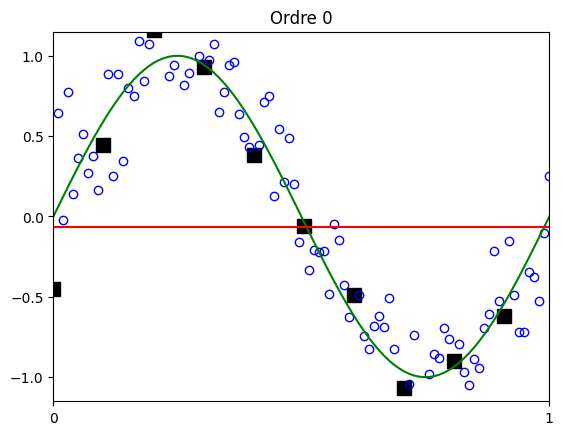

The RMSE on the train set is: 0.7271286622901892
The RMSE on the test set is: 0.7497651365673856


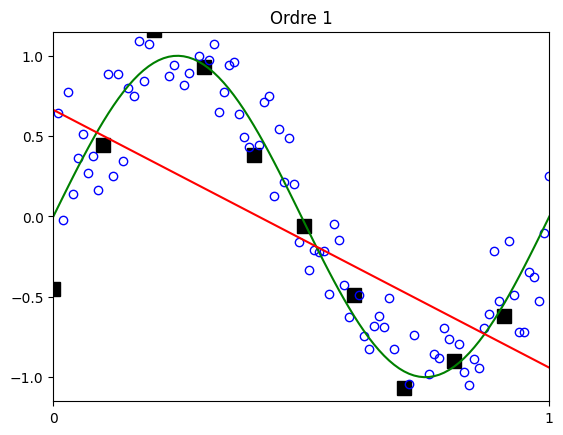

The RMSE on the train set is: 0.5586131543609998
The RMSE on the test set is: 0.523125650707809


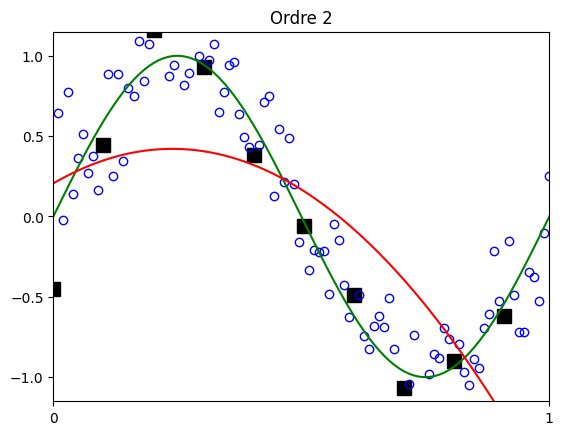

The RMSE on the train set is: 0.4851356471983292
The RMSE on the test set is: 0.5907398428903707


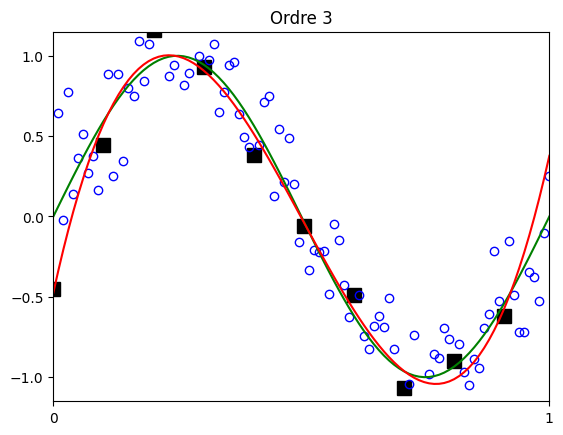

The RMSE on the train set is: 0.1008542074869986
The RMSE on the test set is: 0.27573015101049336


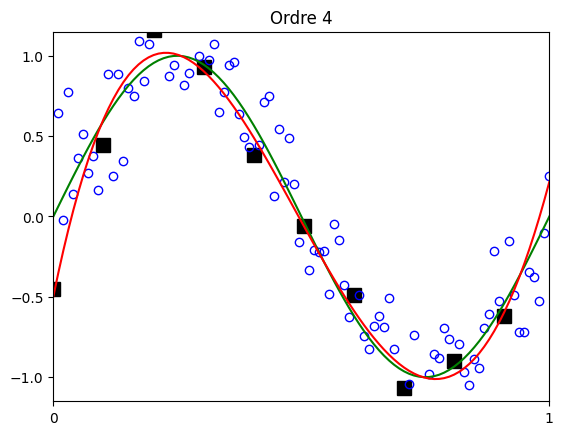

The RMSE on the train set is: 0.09846477929081607
The RMSE on the test set is: 0.26910303224258797


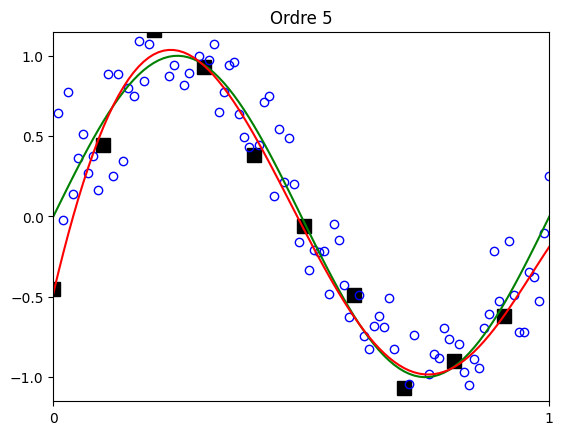

The RMSE on the train set is: 0.09391789678754439
The RMSE on the test set is: 0.2629741081590861


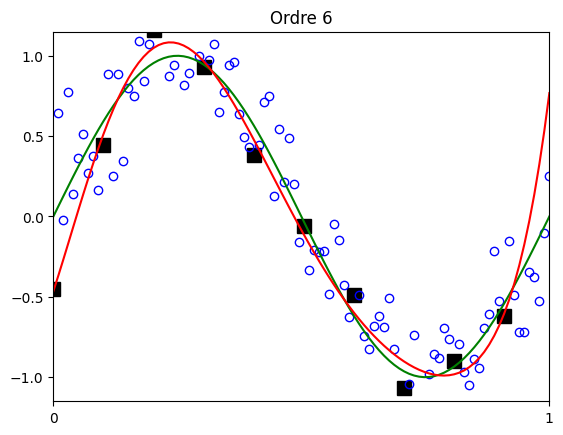

The RMSE on the train set is: 0.08782014777485993
The RMSE on the test set is: 0.3051431760384618


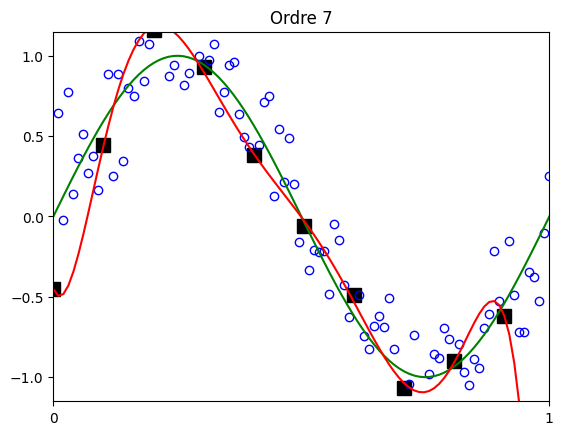

The RMSE on the train set is: 0.023613461902583205
The RMSE on the test set is: 0.8898671050234334


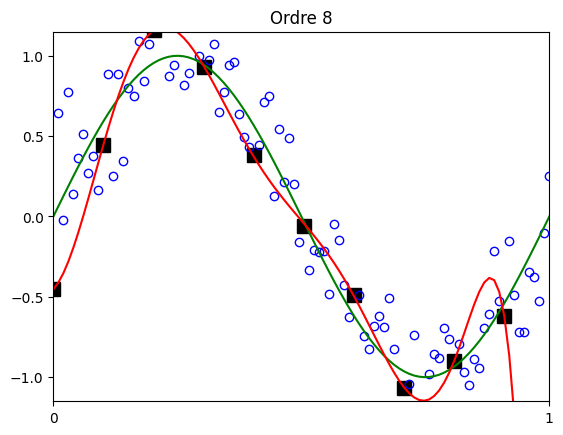

The RMSE on the train set is: 0.007264317058599887
The RMSE on the test set is: 1.6415248288060196


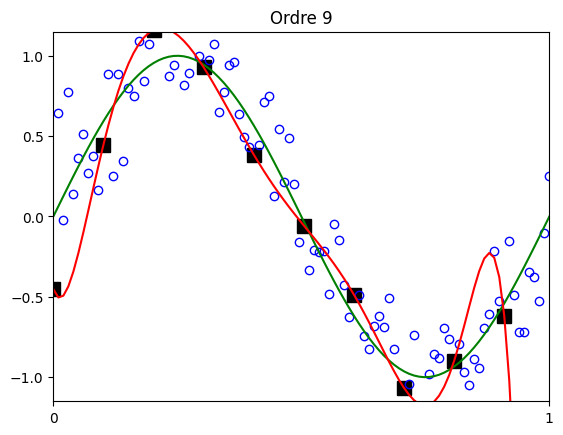

The RMSE on the train set is: 2.7575127140039408e-12
The RMSE on the test set is: 2.7428398682277977


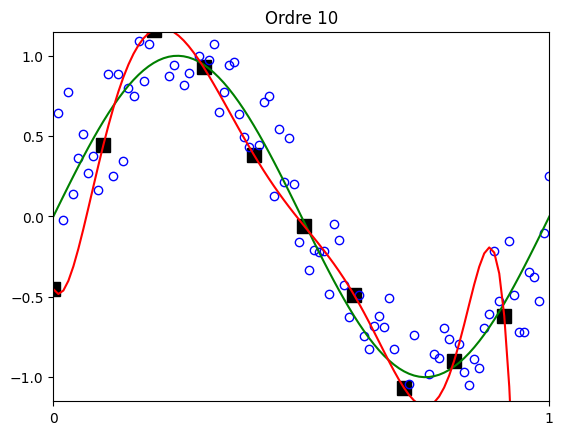

The RMSE on the train set is: 9.748588150196138e-13
The RMSE on the test set is: 3.063307285567197


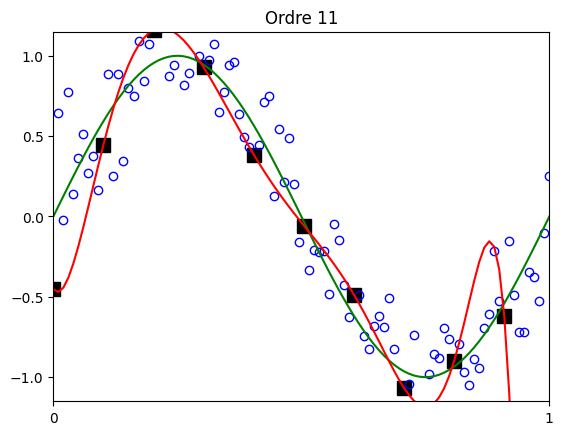

The RMSE on the train set is: 3.5907446897304504e-13
The RMSE on the test set is: 3.442384357777139


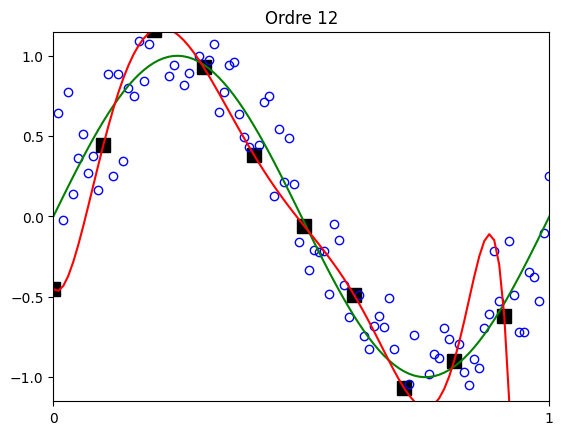

The RMSE on the train set is: 2.133893821097606e-13
The RMSE on the test set is: 3.9080299485423096


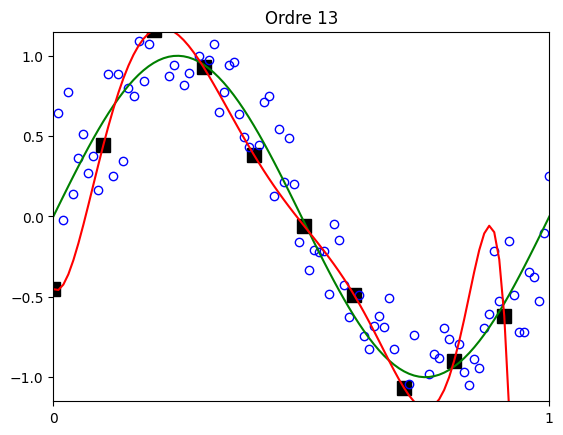

The RMSE on the train set is: 5.601211475034209e-13
The RMSE on the test set is: 4.497353872926772


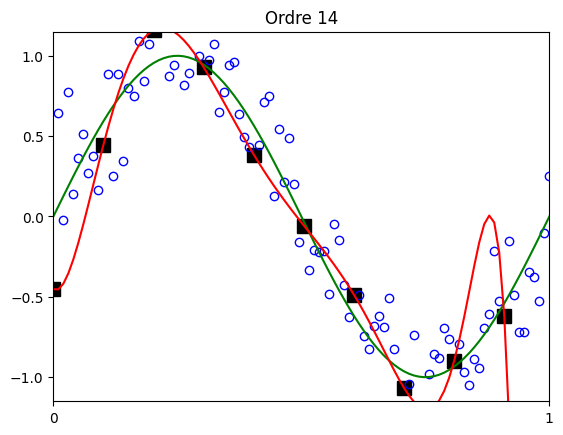

The RMSE on the train set is: 2.60837996354208e-13
The RMSE on the test set is: 5.256642882379239


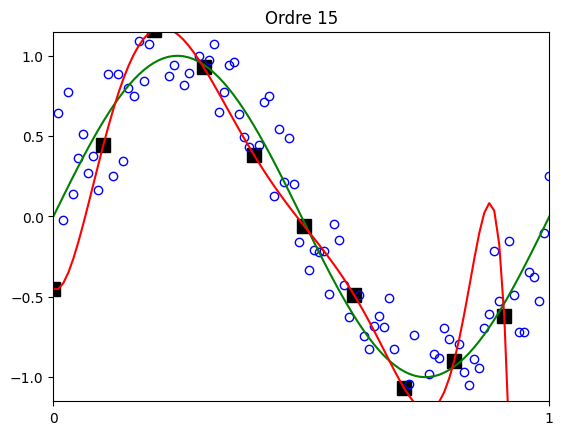

The RMSE on the train set is: 1.9431218643820484e-13
The RMSE on the test set is: 6.240714493131822


In [67]:
# Q2.1 & Q2.2
max_poly_order = 15
for poly_order in np.arange(0, max_poly_order+1, 1, dtype=int):
  poly=PolynomialFeatures(degree=poly_order)
  # expand x (or linearize the problem)
  # this is specific to sklearn, could be done in a simple way with numpy
  x_poly=poly.fit_transform(x.reshape(-1, 1))

  # fit polynomial function (with least square errors)
  clf = linear_model.LinearRegression()
  clf.fit(x_poly[i_train], y_o[i_train])

  # predict values from model
  y_p = clf.predict(x_poly[i])

  # display the predicted values
  plt.title(f'Ordre {poly_order}')
  plt.plot(x[i_train],y_o[i_train],'ks', markersize=10)
  plt.plot(x[i_test],y_o[i_test],'bo', fillstyle='none')
  plt.plot(x,y_t,'g-', fillstyle='none')
  plt.xlim((0,1))
  plt.ylim((-1-0.15,+1+0.15))
  plt.xticks([0,1])
  plt.yticks(np.arange(-1, 1.25, 0.5))
  plt.plot(x,y_p,'r-', fillstyle='none')
  plt.show()

  # compute score (LS)
  e_train = np.sqrt(1/len(i_train)*((y_p[i_train] - y_o[i_train])**2).sum())
  e_test = np.sqrt(1/len(i_test)*((y_p[i_test] - y_o[i_test])**2).sum())

  print("The RMSE on the train set is:", e_train)
  print("The RMSE on the test set is:", e_test)

 

###### Q2.3
Les images (ordre 7, ... , 15) ci-dessus montre des exemples d’Overfitting. Le tracé en rouge représente notre fonction de prédiction (LinearRegression()) qui passe par toutes les données du Training Set (points en noire). On voit bien que notre fonction est instable (grande variance) et qu’elle s’écarte beaucoup des points bleu qui représentent des données non vues lors de la phase d’apprentissage (Test Set).

###### Q2.4
Le meilleur modèle est celui qui possède l'erreur de prédiction la plus petite par rappor aux données de non vues lors de la phase d'apprentissage (Test Set). Dans notre cas le meilleur modèle est le modèle LinearRegression d'ordre 5